In [ ]:
import os
from collections import defaultdict
import json
import pandas as pd
import numpy as np


system_results = defaultdict(lambda: defaultdict(list))
for f_name in os.listdir('results/randoming_gates'):
    if not f_name.endswith('.json'):
        continue

    sys_id = f_name.split('_')[0]
    with open(os.path.join('results/randoming_gates', f_name), 'r') as f:
        f_dict = json.load(f)

    obs_avg_diagnose_size = np.average([len(t[0]) for t in f_dict['predicted_diagnose_baseline']])
    system_results[sys_id]['diagnose_sizes'].append(obs_avg_diagnose_size)

    diff = f_dict['baseline_time'] - f_dict['experiment_time']
    if diff < 0:
        system_results[sys_id]['worse'].append(-diff)
        system_results[sys_id]['worse_normalized'].append(-diff / f_dict['baseline_time'])
    else:
        system_results[sys_id]['better'].append(diff)
        system_results[sys_id]['better_normalized'].append(diff / f_dict['baseline_time'])

results_df = pd.DataFrame(columns=['system', 'number of observations', 'improvements', 'improvement avg',
                                   'normalized improvement avg', 'decreases', 'decrease avg', 'normalized decrease avg',
                                   'avg diagnose size'])

for sys in system_results.keys():
    n_observations = len(system_results[sys]['better']) + len(system_results[sys]['worse'])

    results_df = results_df.append({'system': sys, 'number of observations': n_observations,
                                    'improvements': len(system_results[sys]['better']),
                                    'improvement avg': np.average(system_results[sys]['better']),
                                    'normalized improvement avg': np.average(system_results[sys]['better_normalized']),
                                    'decreases': len(system_results[sys]['worse']),
                                    'decrease avg': np.average(system_results[sys]['worse']),
                                    'normalized decrease avg': np.average(system_results[sys]['worse_normalized']),
                                    'avg diagnose size': np.average((system_results[sys]['diagnose_sizes']))},
                                   ignore_index=True)

results_df.to_csv('summed_results.csv', index=False)
results_df

In [73]:
import os
from collections import defaultdict
import json
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm

data = pd.DataFrame(columns=['system', 'observation', 'diagnosis_size', 'algorithm', 'time'])

for f_name in tqdm(os.listdir('results/randoming_gates')):
    if not f_name.endswith('.json'):
        continue

    obs_id = f_name.split('_')[1][:-5]
    sys_id = f_name.split('_')[0]
    with open(os.path.join('results/randoming_gates', f_name), 'r') as f:
        f_dict = json.load(f)
    
    obs_avg_diagnose_size = float(np.average([len(t[0]) for t in f_dict['predicted_diagnose_baseline']]))
    
    data = data.append({'system': sys_id, 'observation': int(obs_id), 'diagnosis_size': obs_avg_diagnose_size, 'algorithm':'baseline',
                        'time': f_dict['baseline_time']}, ignore_index=True)
    
    data = data.append({'system': sys_id, 'observation': int(obs_id), 'diagnosis_size': obs_avg_diagnose_size, 'algorithm':'previous_obs',
                        'time': f_dict['experiment_previous_time']}, ignore_index=True)
    
    data = data.append({'system': sys_id, 'observation': int(obs_id), 'diagnosis_size': obs_avg_diagnose_size, 'algorithm':'dependencies',
                        'time': f_dict['experiment_dependencies_time']}, ignore_index=True)
    
    data = data.append({'system': sys_id, 'observation': int(obs_id), 'diagnosis_size': obs_avg_diagnose_size, 'algorithm':'combined',
                        'time': f_dict['experiment_all_time']}, ignore_index=True)
    
data.to_csv('results.csv', index=False)

In [75]:
data

,system,observation,diagnosis_size,algorithm,time
0,c17,23,1.000000,baseline,0.001460
1,c17,23,1.000000,previous_obs,0.000597
2,c17,23,1.000000,dependencies,0.000702
3,c17,23,1.000000,combined,0.000827
4,74182,94,2.580645,baseline,8.574772
5,74182,94,2.580645,previous_obs,8.555243
6,74182,94,2.580645,dependencies,7.668021
7,74182,94,2.580645,combined,7.426626
8,74283,100,2.322581,baseline,4389.347044
9,74283,100,2.322581,previous_obs,6348.416197


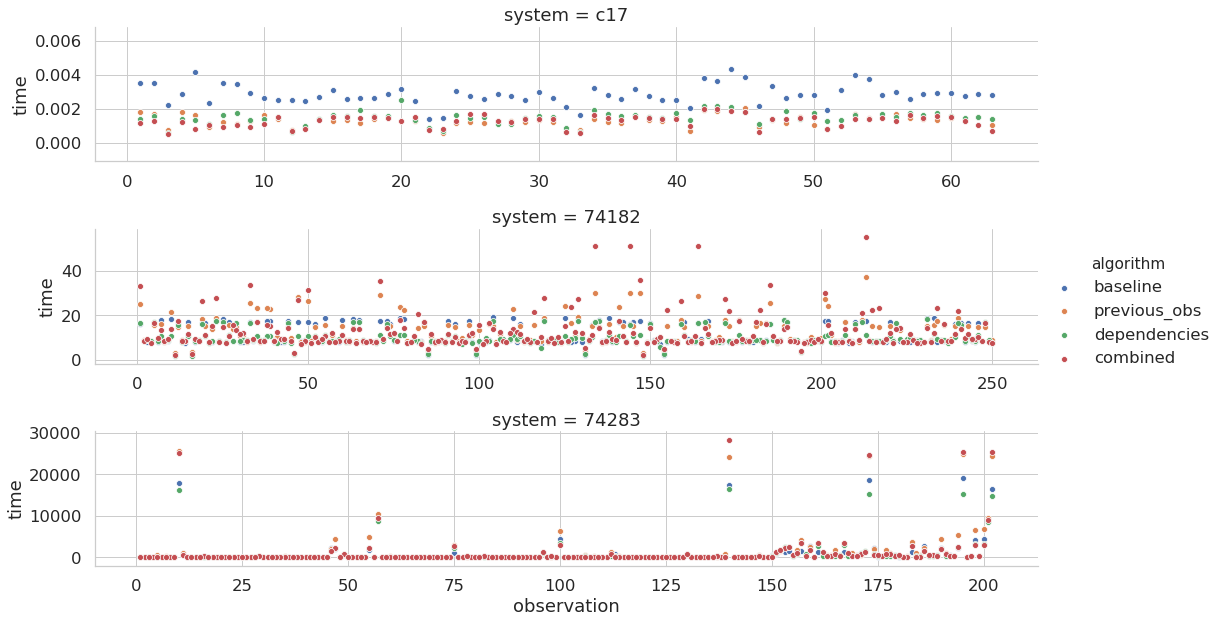

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


sns.set(font_scale=1.5, style='whitegrid')
g = sns.FacetGrid(data=data, row="system", hue='algorithm', aspect=5, height=3, sharex=False, sharey=False)
g = g.map(sns.scatterplot, 'observation', 'time')
g.add_legend()

/data/home/netzerg/anaconda3/envs/venv/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


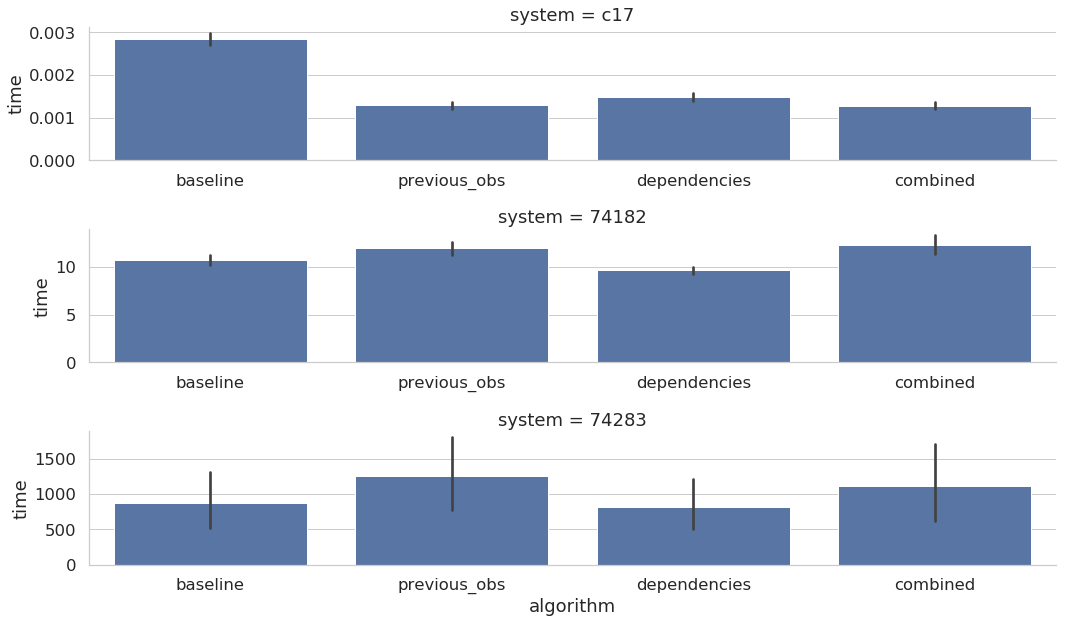

In [84]:
# grouped_data = data.groupby(['system', 'algorithm'])['time'].mean().to_frame('time').reset_index()
sns.set(font_scale=1.5, style='whitegrid')
g = sns.FacetGrid(data=data, row="system", aspect=5, height=3, sharex=False, sharey=False)
g = g.map(sns.barplot, 'algorithm', 'time')
g.add_legend()